<a href="https://colab.research.google.com/github/trinhvy1411/TRI-TUE-NHAN-TAO/blob/main/buoi05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

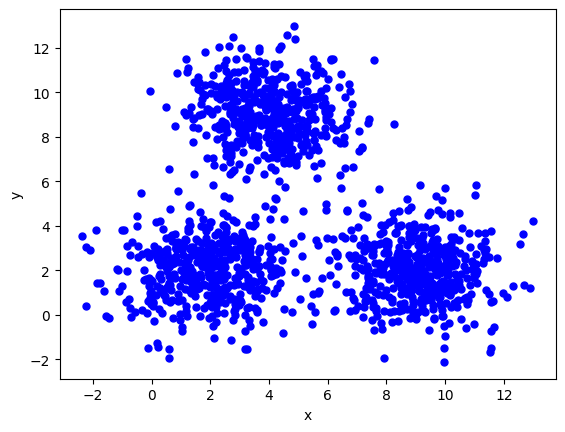

[[1.60841857 2.53957386]
 [1.36962672 1.18673772]
 [9.47131084 3.10526341]]


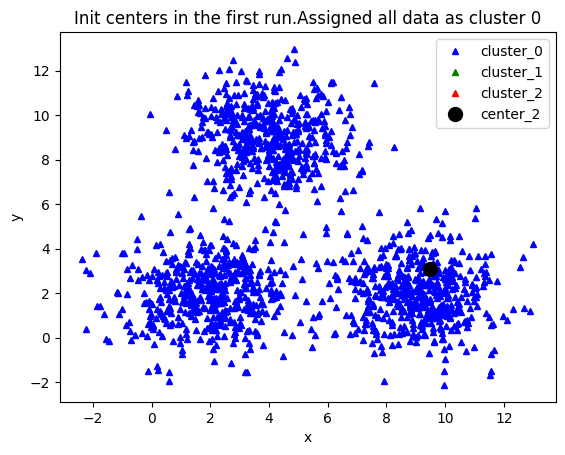

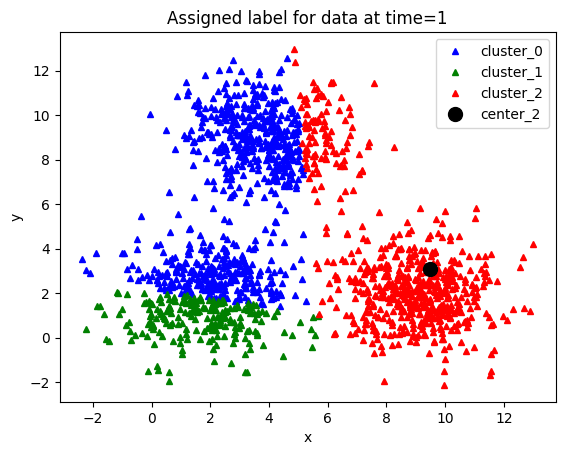

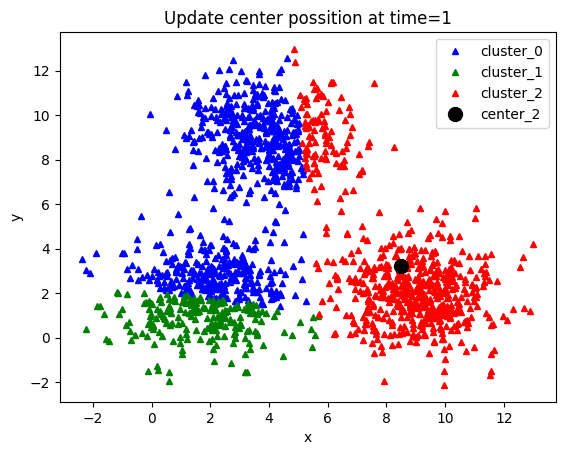

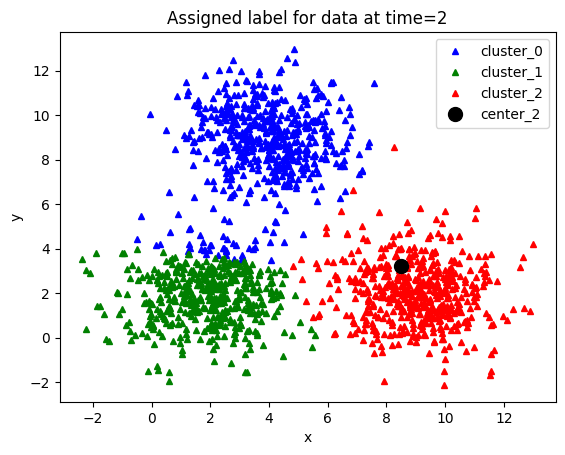

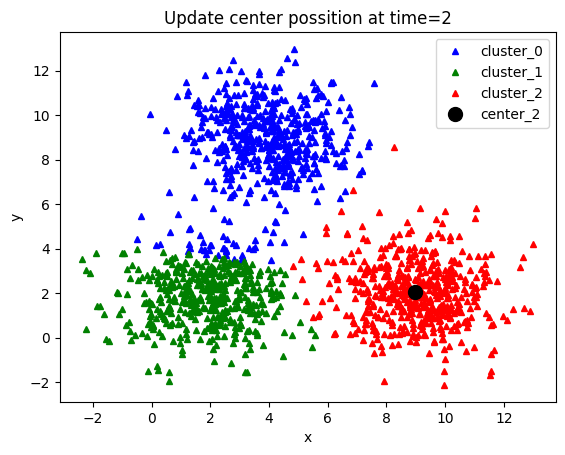

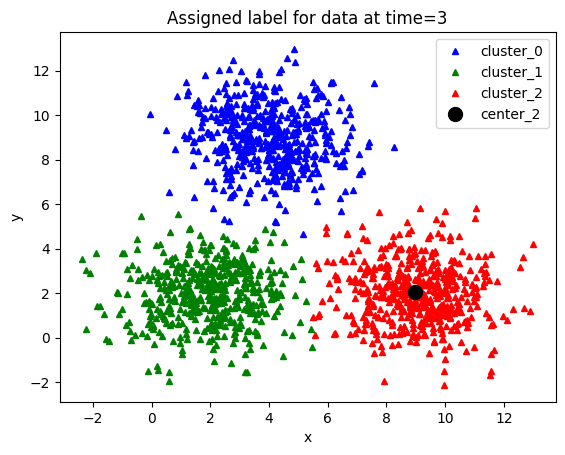

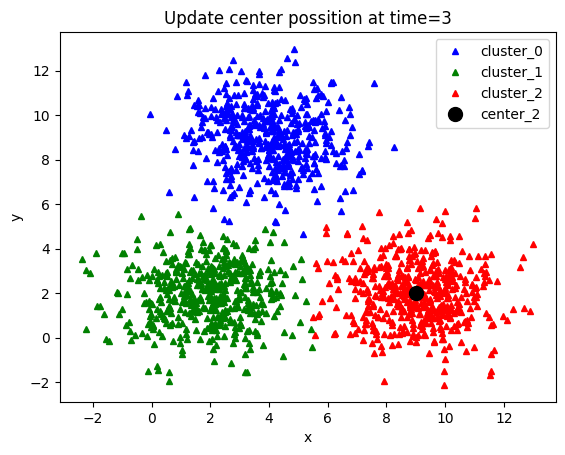

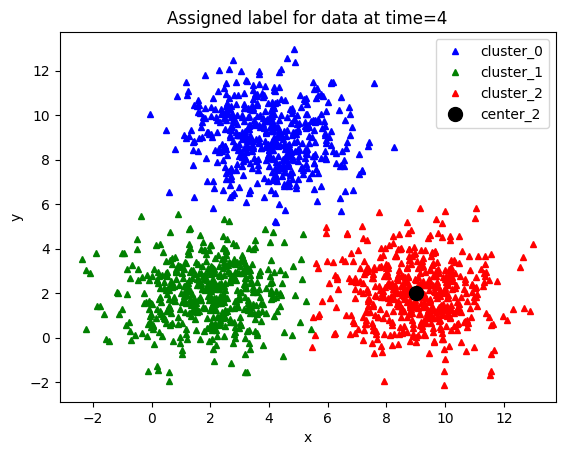

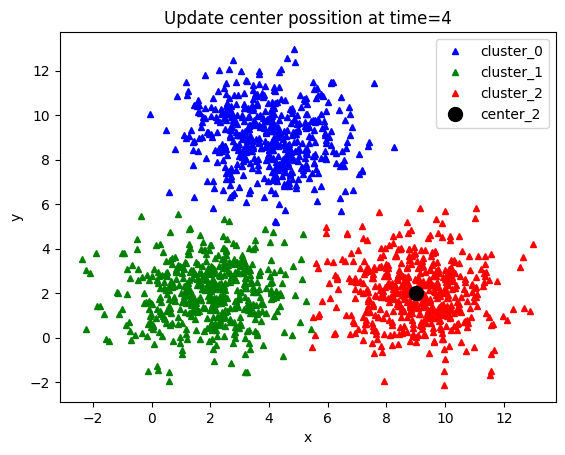

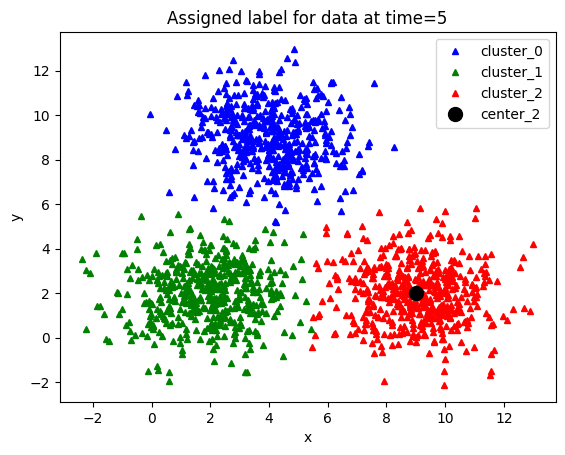

Done! Kmeans has converged after 4 times
[[3.97592113 9.02437458]
 [1.88865064 2.00935532]
 [8.99737659 2.00534843]]


In [2]:
import numpy as np # thư viện tính toán toán học
import matplotlib.pyplot as plt # visualize data sử dụng đồ thị
from scipy.spatial.distance import cdist # Hỗ trợ tính khoảng cách

means = [[2, 2], [9, 2], [4, 9]]
cov=[[2,0],[0,2]]
n_samples = 500
n_cluster=3
x0=np.random.multivariate_normal(means[0],cov,n_samples)
x1=np.random.multivariate_normal(means[1],cov,n_samples)
x2=np.random.multivariate_normal(means[2],cov,n_samples)
x=np.concatenate((x0,x1,x2),axis=0)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x[:, 0], x[:, 1], 'bo', markersize=5)
plt.plot()
plt.show()

def kmeans_init_centers(X, n_cluster):
    # random k index beetween 0 and shape(X) without duplicate index.
    # Then return X[index] as cluster
    return X[np.random.choice(X.shape[0], n_cluster, replace=False)]

def kmeans_predict_labels(X, centers):
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, n_cluster):
    centers = np.zeros((n_cluster, X.shape[1]))
    for k in range(n_cluster):
        # collect all points assigned to the k-th cluster
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

def kmeans_has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) ==
            set([tuple(a) for a in new_centers]))

# Hàm này dùng để vẽ dữ liệu lên đồ thị
# Random color chỉ làm việc với k <= 4
# Nếu bạn thay đổi k > 4, hãy sửa lại phần random color nhé
# Chỉ sử dụng trong bài toán này thôi nhé.
def kmeans_visualize(X, centers, labels, n_cluster, title):
    plt.xlabel('x') # label trục x
    plt.ylabel('y') # label trục y
    plt.title(title) # title của đồ thị
    plt_colors = ['b','g','r','c','m','y','k','w'] # danh sách các
    #màu hỗ trợ
    for i in range(n_cluster):
        data = X[labels == i] # lấy dữ liệu của cụm i
        plt.plot(data[:, 0], data[:, 1], plt_colors[i] + '^', markersize=4,
                 label= 'cluster_'+str(i)) # Vẽ cụm i lên đồ thị
    plt.plot(centers[i][0], centers[i][1], plt_colors[i + 4] + 'o',
             markersize=10,
             label= 'center_'+str(i)) # Vẽ tâm cụm i lên đồ thị
    plt.legend() # Hiện bảng chú thích
    plt.show()

def kmeans(init_centers, X, n_cluster):
    centers = init_centers
    labels = np.zeros(X.shape[0])
    it = 0
    while True:
        labels = kmeans_predict_labels(X, centers)
        kmeans_visualize(X,centers,labels,n_cluster,'Assigned label for data at time='+str(it+1))
        new_centers=kmeans_update_centers(X,labels,n_cluster)
        if kmeans_has_converged(centers,new_centers):
            break
        centers=new_centers # Corrected 'new+centers' to 'new_centers'
        kmeans_visualize(X,centers,labels,n_cluster,'Update center possition at time='+str(it+1)) # Corrected 'n_cluser' to 'n_cluster' and 'time' to 'it'
        it+=1 # Corrected 'time' to 'it'
    return (centers,labels,it) # Corrected 'times' to 'it'

init_centers = kmeans_init_centers(x, n_cluster)
print(init_centers) # In ra tọa độ khởi tạo ban đầu của các tâm cụm
init_labels = np.zeros(x.shape[0])
kmeans_visualize(x, init_centers, init_labels, n_cluster,'Init centers in the first run.Assigned all data as cluster 0')
centers, labels, times = kmeans(init_centers, x, n_cluster) # Removed init_labels from kmeans call and changed X to x
print('Done! Kmeans has converged after',times,'times')
print(centers)


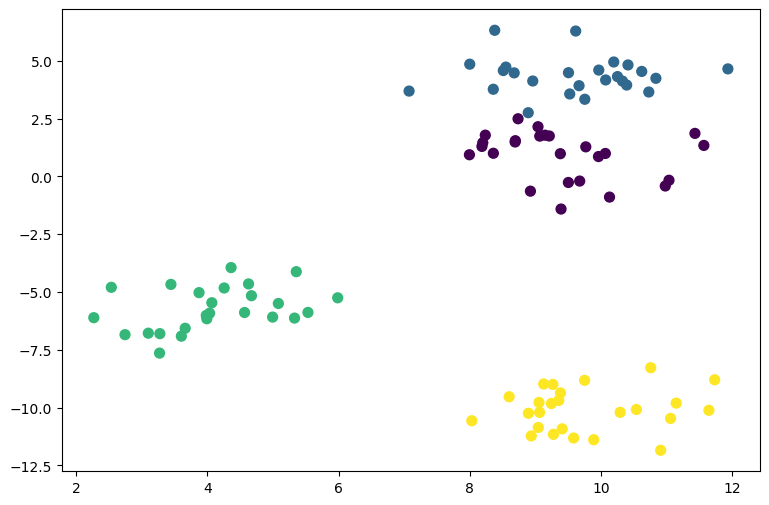

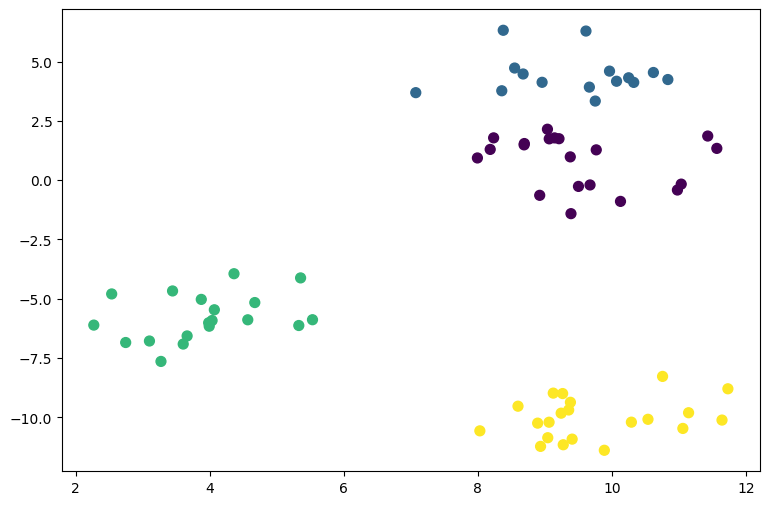

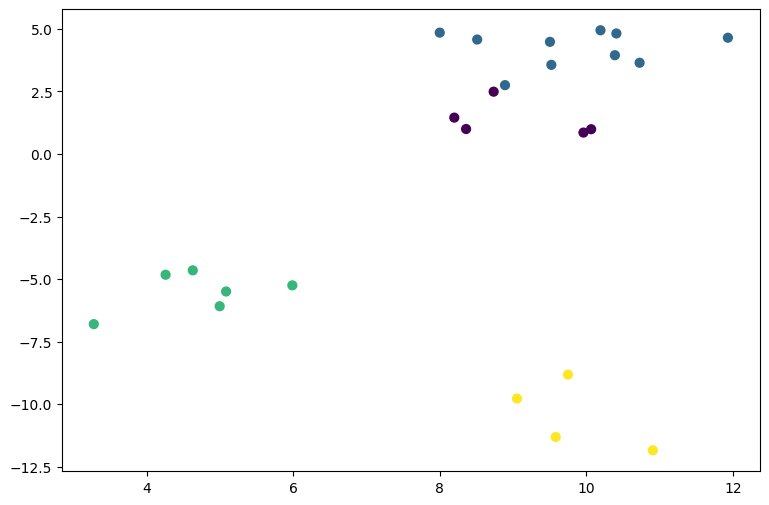

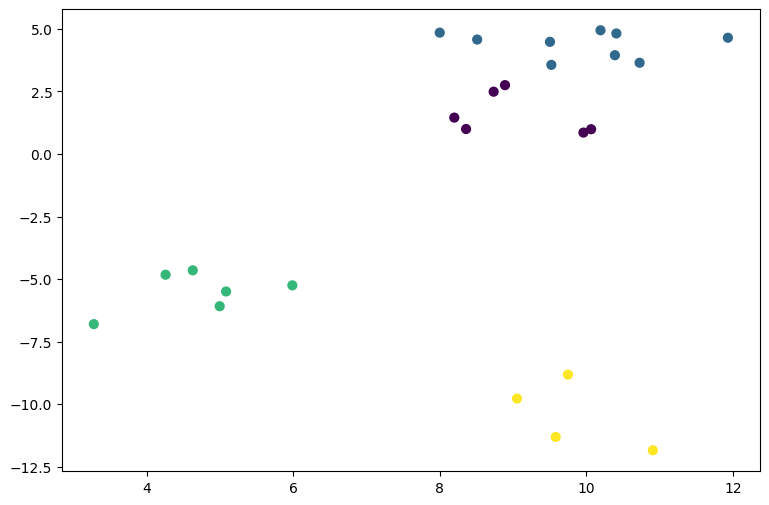

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # datavisualization
from sklearn.datasets import make_blobs # synthetic dataset
from sklearn.neighbors import KNeighborsClassifier # kNN classifier
from sklearn.model_selection import train_test_split # train and test SETS
X,y=make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=1,random_state=4)
plt.figure(figsize=(9,6))
plt.scatter(X[:, 0],X[:, 1],c=y, marker='o',s=50)
plt.show()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
plt.figure(figsize=(9,6))
plt.scatter(X_train[:, 0],X_train[:, 1],c=y_train, marker='o',s=50)
plt.show()
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
plt.figure(figsize = (9,6))
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, marker='o', s=40)
plt.show()
knn5 = KNeighborsClassifier(5) # k=5
knn5.fit(X_train, y_train)
y_pred_5 = knn5.predict(X_test)
plt.figure(figsize = (9,6))
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_5, marker='o', s=40)
plt.show()


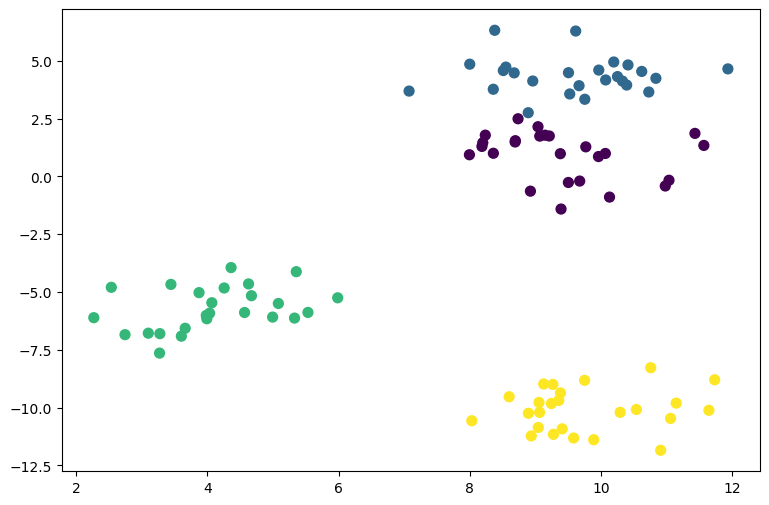

{'n_neighbors': np.int64(2)}


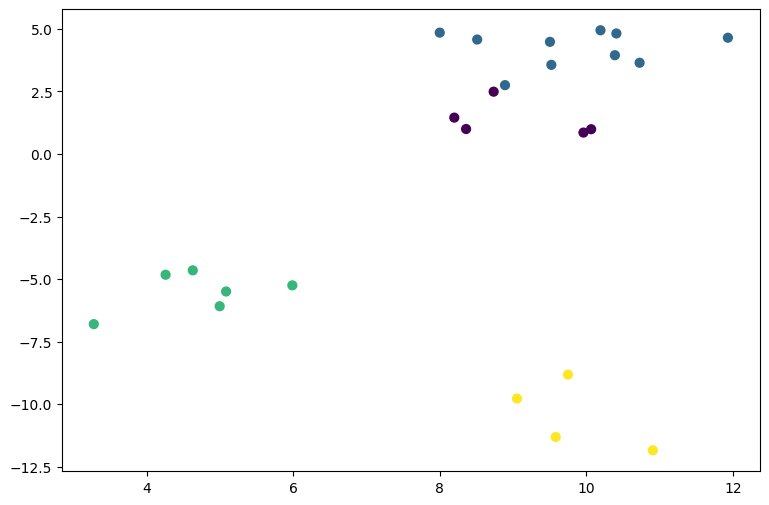

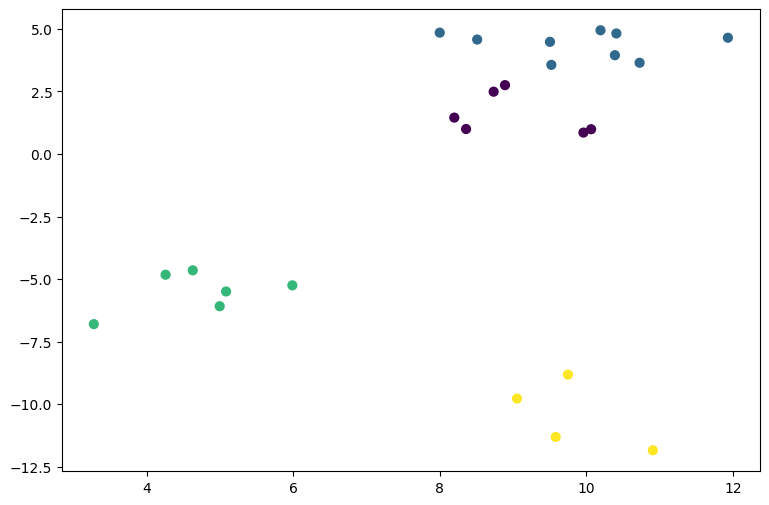

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # datavisualization
from sklearn.datasets import make_blobs # synthetic dataset
from sklearn.neighbors import KNeighborsClassifier # kNN classifier
from sklearn.model_selection import train_test_split # train and test SETS
X,y=make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=1,random_state=4)
plt.figure(figsize=(9,6))
plt.scatter(X[:, 0],X[:, 1],c=y, marker='o',s=50)
plt.show()
from sklearn.model_selection import GridSearchCV
knn_gird= GridSearchCV(estimator=KNeighborsClassifier(),
                       param_grid={'n_neighbors':np.arange(1,10)},cv=5)
knn_gird.fit(X,y)
print(knn_gird.best_params_)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
plt.figure(figsize = (9,6))
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, marker='o', s=40)
plt.show()
knn5 = KNeighborsClassifier(5) # k=5
knn5.fit(X_train, y_train)
y_pred_5 = knn5.predict(X_test)
plt.figure(figsize = (9,6))
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_5, marker='o', s=40)
plt.show()

In [10]:
def KNN(X_train,X_test,y_train,k):
    num_test = X_test.shape[0]
    num_train = X_train.shape[0]
    y_pred = np.zeros((num_test,num_train))
# duyệt qua mỗi điểm trong tập test
    for i in range(num_test):
# tương ứng một điểm trong tập test sẽ duyêt qua hết bộ train
      for j in range(num_train):
        y_pred[i,j] = np.sqrt(np.sum(np.power(X_test[i,:]-
X_train[j,:],2)))
    results = []
    for i in range(len(y_pred)):
        zipped = zip(y_pred[i,:],y_train)
        res = sorted(zipped,key = lambda x:x[0])
        results_topk = res[:k]
    # Đếm số lượng của mỗi class
        classes = {}
        for _,j in results_topk:
          j = int(j)
          if j not in classes:
              classes[j] = 1
          else:
              classes[j] = classes[j] + 1
    # trả về class có số lượng nhiều nhất
        results.append(max(classes,key = classes.get))
    return np.array(results)
(X,y) = make_blobs(n_samples = 500, n_features = 2, centers = 4,
cluster_std = 1, random_state = 4)
X_test=np.array([(1,3)])
results = KNN(X,X_test,y,3)
print (results)

[0]
